<a href="https://colab.research.google.com/github/rdboyes/2019_toronto_health_hack/blob/master/Accessing_c_spine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import auth
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()

In [0]:
auth.authenticate_user()

## Using the gsutil commandline tool

In [0]:
%%bash
gsutil ls gs://vector-data-bucket-smh/*

gs://vector-data-bucket-smh/C_Spine_Hackathon/:
gs://vector-data-bucket-smh/C_Spine_Hackathon/
gs://vector-data-bucket-smh/C_Spine_Hackathon/Mask_map_colour.xlsx
gs://vector-data-bucket-smh/C_Spine_Hackathon/Negative_cases.zip
gs://vector-data-bucket-smh/C_Spine_Hackathon/Negative_metadata.csv
gs://vector-data-bucket-smh/C_Spine_Hackathon/Positive_cases.zip
gs://vector-data-bucket-smh/C_Spine_Hackathon/Positive_metadata.csv
gs://vector-data-bucket-smh/C_Spine_Hackathon/README.txt
gs://vector-data-bucket-smh/C_Spine_Hackathon/Negative_cases/
gs://vector-data-bucket-smh/C_Spine_Hackathon/Positive_cases/

gs://vector-data-bucket-smh/GIM/:
gs://vector-data-bucket-smh/GIM/
gs://vector-data-bucket-smh/GIM/pre-processed/
gs://vector-data-bucket-smh/GIM/raw-data/


## Using tf.gfile for a python-file-esque interface

In [0]:
show_first_n_folders = 15
tf.io.gfile.listdir('gs://vector-data-bucket-smh/C_Spine_Hackathon/Positive_cases/')[:show_first_n_folders]

['.DS_Store',
 'P1/',
 'P10/',
 'P100/',
 'P101/',
 'P102/',
 'P103/',
 'P104/',
 'P105/',
 'P106/',
 'P107/',
 'P108/',
 'P109/',
 'P11/',
 'P110/']

In [0]:
tf.io.gfile.listdir('gs://vector-data-bucket-smh/C_Spine_Hackathon/Positive_cases/P1')

['.DS_Store',
 'fracture_images_with_mask/',
 'fracture_images_without_mask/',
 'full_CT_images/',
 'masks/']

In [0]:
path = 'gs://vector-data-bucket-smh/C_Spine_Hackathon/Positive_cases/P1/full_CT_images/P1_1.png'
with tf.io.gfile.GFile(path, 'rb') as png_file:
    png_bytes = png_file.read()
    image_array = tf.image.decode_image(png_bytes)

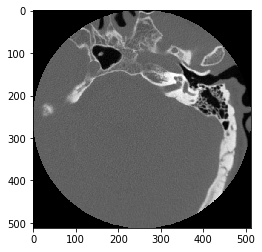

In [0]:
plt.imshow(image_array[:,:,0], cmap='gray');

Roughly follow the instructions [here](https://www.tensorflow.org/tutorials/load_data/images) to build your training loop.

For example, you can build a training dataset by doing something like this. Your team should be more careful about how you generate your labels and choose your input images, but this should get the general idea across.

## Using tf.data to build a training loop

In [0]:
paths_dataset = tf.data.Dataset.list_files('gs://vector-data-bucket-smh/C_Spine_Hackathon/*/*/full_CT_images/*.png')

<DatasetV1Adapter shapes: (), types: tf.string>

In [0]:
def parse_example(path):
    png_bytes = tf.io.read_file(path)
    image_bytes = tf.image.decode_image(png_bytes)
    image_float = tf.image.convert_image_dtype(image_bytes, tf.float32)
    label = tf.cast(tf.strings.regex_full_match(path, r'.*Positive.*'), tf.float32)
    return label, image_float

In [0]:
input_datatset = paths_dataset.map(parse_example).shuffle(1024)